<a href="https://colab.research.google.com/github/whisper120/Cloud_computing_Course/blob/main/HW2/hw2_finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


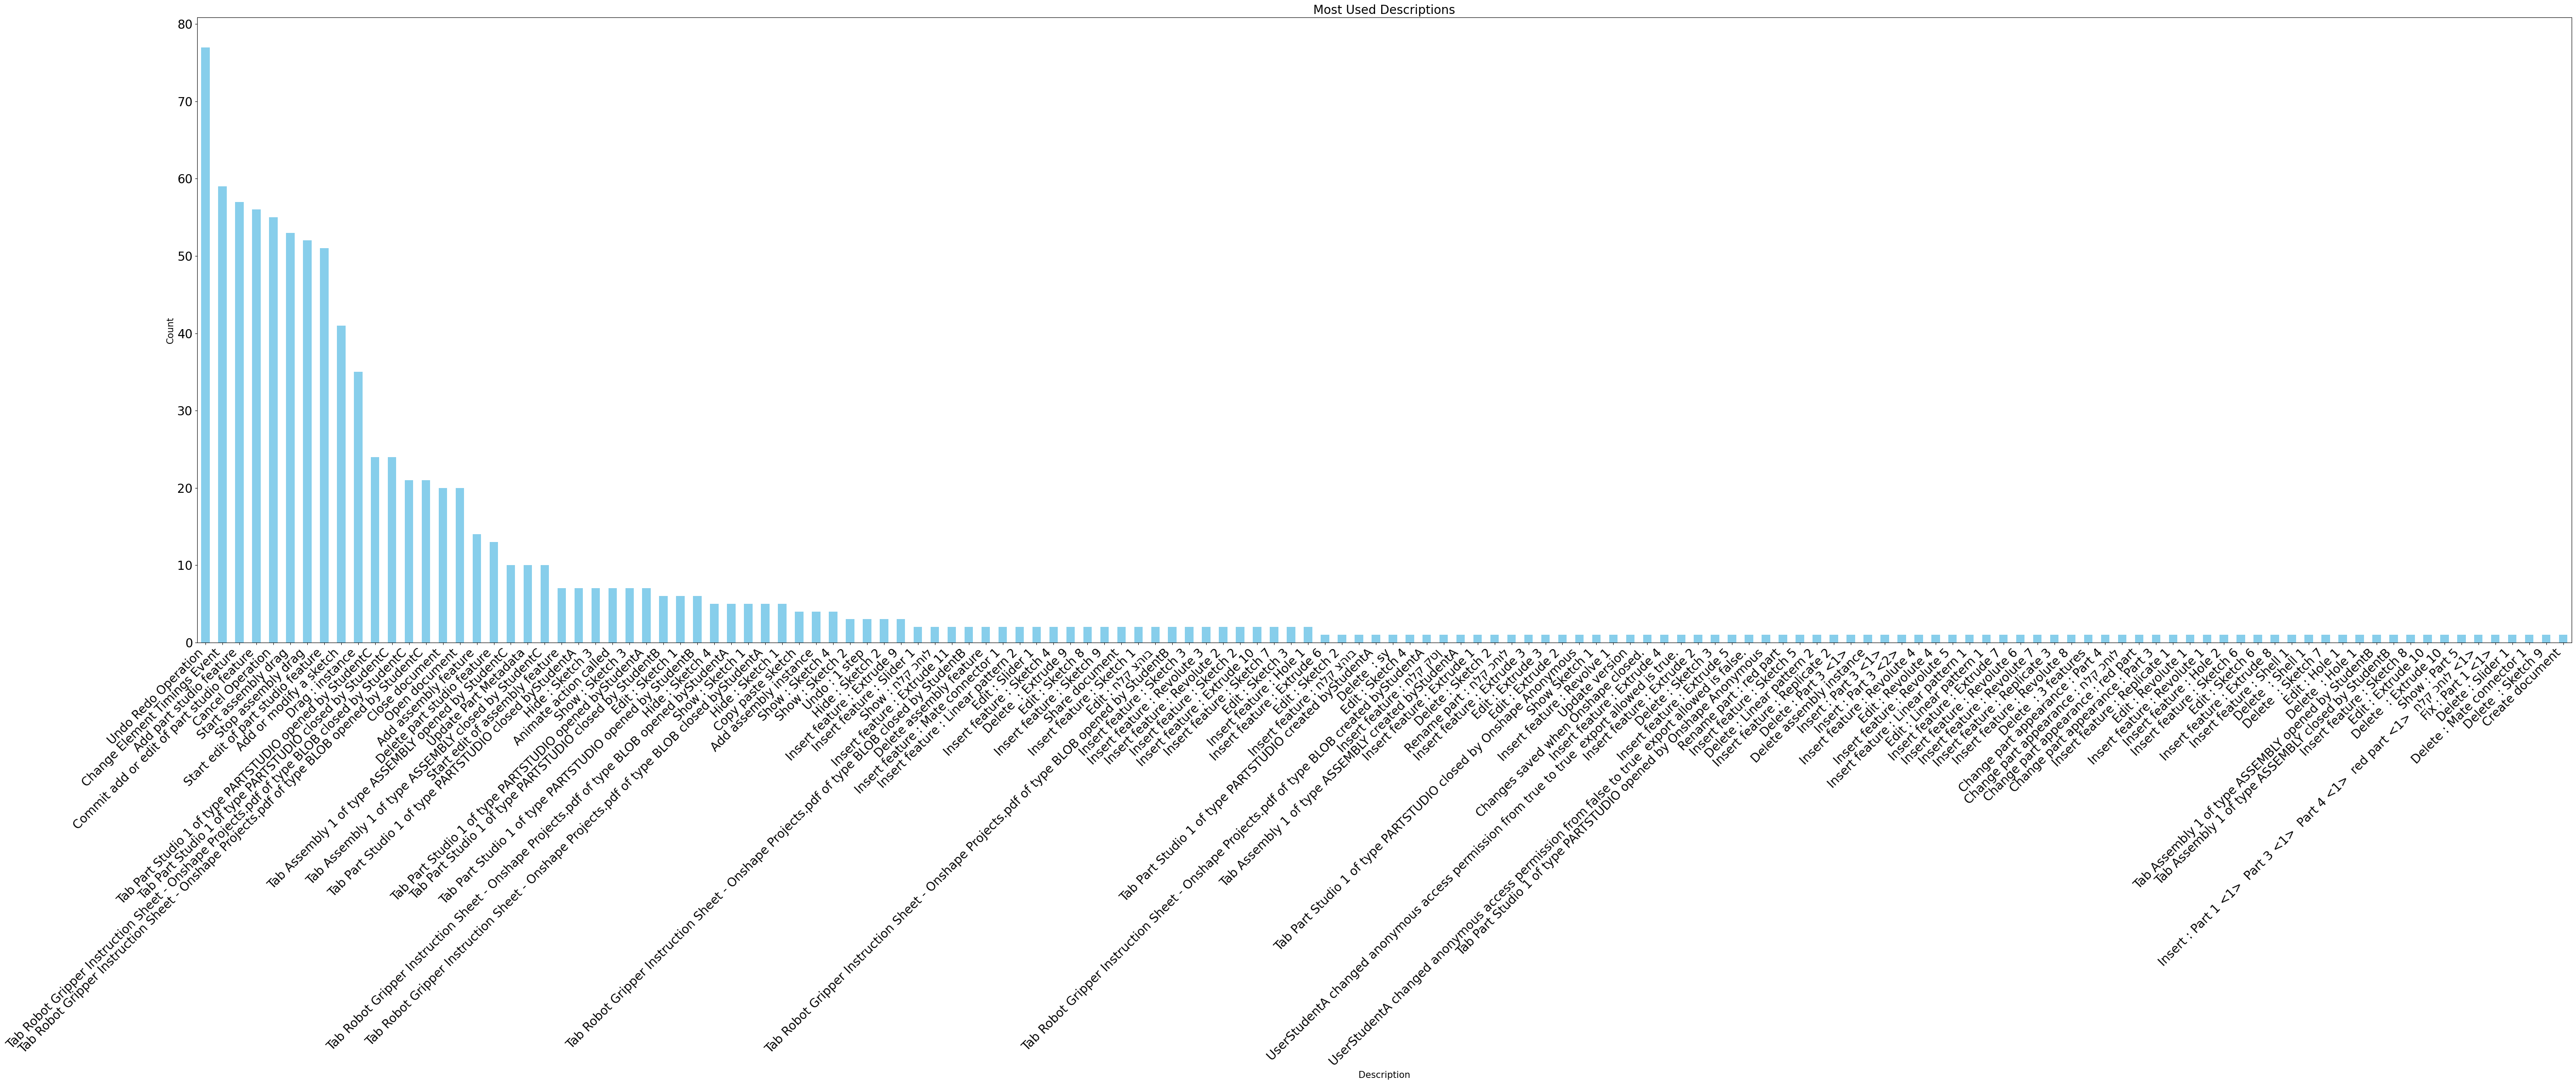

In [35]:
import json
from google.colab import drive
from IPython.display import display, HTML
from google.colab import output
import pandas as pd
import matplotlib.pyplot as plt

drive.mount('/content/drive')

# Load the JSON file
file_path = '/content/drive/My Drive/edited Audit Trail Dashboard (6).json_label'
data = pd.read_json(file_path)

# Function to generate the bar chart for most used descriptions
def generate_description_bar_chart():
    description_counts = data['Description'].value_counts()
    plt.figure(figsize=(60, 25))
    description_counts.plot(kind='bar', color='skyblue')
    plt.title('Most Used Descriptions', fontsize=20)
    plt.xlabel('Description', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.xticks(rotation=45, ha='right', fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show()

# Function to generate the time series plot for number of actions over time
def generate_time_series_plot():
    data['Time'] = pd.to_datetime(data['Time'])
    time_counts = data.set_index('Time').resample('D').size()
    plt.figure(figsize=(15, 8))
    time_counts.plot(kind='line', marker='o')
    plt.title('Number of Actions Over Time', fontsize=20)
    plt.xlabel('Time', fontsize=15)
    plt.ylabel('Number of Actions', fontsize=15)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to generate the bar chart for actions by user
def generate_user_bar_chart():
    user_counts = data['User'].value_counts()
    plt.figure(figsize=(15, 8))
    user_counts.plot(kind='bar', color='lightgreen')
    plt.title('Actions by User', fontsize=20)
    plt.xlabel('User', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Function to generate the pie chart for action types distribution
def generate_pie_chart():
    description_counts = data['Description'].value_counts()

    # Function to format the labels, hiding those with percentage less than 0.7%
    def autopct_format(pct):
        return ('%1.1f%%' % pct) if pct > 0.7 else ''

    # Function to format the labels, hiding those with percentage less than 0.7%
    def label_format(label, pct):
        return label if pct > 0.7 else ''

    plt.figure(figsize=(15, 8))
    wedges, texts, autotexts = plt.pie(description_counts, autopct=autopct_format, startangle=90, colors=plt.cm.Paired.colors, labels=[label_format(label, pct) for label, pct in zip(description_counts.index, description_counts / description_counts.sum() * 100)])
    plt.title('Action Types Distribution', fontsize=20)
    plt.ylabel('')
    plt.legend([],[], frameon=False) # Remove legend entries
    plt.tight_layout()
    plt.show()


# JavaScript function to send a message to Python
js_code = """
function send_message(chart_type) {
  google.colab.kernel.invokeFunction('notebook.send_message', [chart_type], {});
}
"""

# Add the JavaScript to the notebook
output.eval_js(js_code)

# Define the callback function in Python
def send_message_callback(chart_type):
    if chart_type == 'description':
        generate_description_bar_chart()
    elif chart_type == 'time_series':
        generate_time_series_plot()
    elif chart_type == 'user':
        generate_user_bar_chart()
    elif chart_type == 'pie_chart':
        generate_pie_chart()

# Register the callback with Google Colab
output.register_callback('notebook.send_message', send_message_callback)

# HTML for the buttons
buttons_html = """
<div style="text-align: center;">
  <button onclick="send_message('description')">Generate Description Bar Chart</button>
  <button onclick="send_message('time_series')">Generate Time Series Plot</button>
  <button onclick="send_message('user')">Generate User Bar Chart</button>
  <button onclick="send_message('pie_chart')">Generate Pie Chart</button>
</div>
"""

# Display the buttons
display(HTML(buttons_html))
